In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
# pd.set_option("max_columns", None)
# pd.set_option('max_colwidth', None)
from collections import defaultdict

nested_dict = lambda: defaultdict(nested_dict)

# from  csv

In [2]:
filenames = ['cif10_apgd-ce.csv', 'cif10_apgd-cel2.csv']

dataframes = []

for filename in filenames:
    for run in [20, 21, 22, 23]:
        path = "/home/lorenzp/adversialml/src/analysis/variance/run_{}/{}".format(run, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

df_all = pd.concat(dataframes)
df_all

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd
0,./data/detection/run_20/cif10/wrn_28_10_10/apg...,100.00,91.20,81.71,86.63,75.00,80.39,88.42,25.00,25.00
1,./data/detection/run_20/cif10/wrn_28_10_10/apg...,100.00,96.78,93.03,92.47,93.68,93.07,92.37,6.32,6.32
2,./data/detection/run_20/cif10/wrn_28_10_10/apg...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
3,./data/detection/run_20/cif10/wrn_28_10_10/apg...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
4,./data/detection/run_20/cif10/wrn_28_10_10/apg...,100.00,97.85,93.68,93.92,93.42,93.67,93.95,6.58,6.58
...,...,...,...,...,...,...,...,...,...,...
45,./data/detection/run_23/cif10/wrn_28_10_10/apg...,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
46,./data/detection/run_23/cif10/wrn_28_10_10/apg...,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
47,./data/detection/run_23/cif10/wrn_28_10_10/apg...,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
48,./data/detection/run_23/cif10/wrn_28_10_10/apg...,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00


In [3]:
# df['point', 'data', 'folder', 'run', 'dataset', 'net', 'attack', 'epsilon', 'def', 'k', 'clf', 'log'] = df['Unnamed: 0'].str.split('/', -1, expand=True)
split =  df_all['Unnamed: 0'].str.split('/',  expand=True)
split

,0,1,2,3,4,5,6,7,8,9,10,11
0,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_3,LR,log.txt
1,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_5,LR,log.txt
2,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_30,LR,log.txt
3,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_50,LR,log.txt
4,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_10,LR,log.txt
...,...,...,...,...,...,...,...,...,...,...,...,...
45,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_10,RF,log.txt
46,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_5,RF,log.txt
47,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_30,RF,log.txt
48,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_50,RF,log.txt


In [16]:
split[9].str.split('_', -1, expand=True)[1]
split[9]
# split

0      k_3
1      k_5
2     k_30
3     k_50
4     k_10
      ... 
45    k_10
46     k_5
47    k_30
48    k_50
49     k_3
Name: 9, Length: 400, dtype: object

In [7]:
df_all['attack'] = split[6]
df_all['epsilon'] = split[7]
df_all['k'] = split[9].str.split('_', -1, expand=True)[1]
df_all['clf'] = split[10]
df_all

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd,attack,epsilon,k,clf
0,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_3/LR/log.txt,100.00,91.20,81.71,86.63,75.00,80.39,88.42,25.00,25.00,apgd-ce,8_255,3,LR
1,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_5/LR/log.txt,100.00,96.78,93.03,92.47,93.68,93.07,92.37,6.32,6.32,apgd-ce,8_255,5,LR
2,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_30/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,30,LR
3,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_50/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,50,LR
4,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_10/LR/log.txt,100.00,97.85,93.68,93.92,93.42,93.67,93.95,6.58,6.58,apgd-ce,8_255,10,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_10/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,10,RF
46,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_5/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,5,RF
47,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_30/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,30,RF
48,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_50/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,50,RF


In [8]:
df_all.to_csv('csv/df_all.csv')

In [9]:
df_all.query("(attack=='apgd-cel2') and (clf=='LR') and (k=='30') and (epsilon=='01')")

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd,attack,epsilon,k,clf
23,./data/detection/run_20/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,27.41,75.82,71.45,71.39,71.58,71.48,71.32,28.42,7.79,apgd-cel2,01,30,LR
1,./data/detection/run_21/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,27.43,77.82,73.16,72.92,73.68,73.30,72.63,26.32,7.22,apgd-cel2,01,30,LR
20,./data/detection/run_22/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,99.61,71.01,67.37,69.76,61.32,65.27,73.42,38.68,38.53,apgd-cel2,01,30,LR
0,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,26.96,79.27,70.39,74.92,61.32,67.44,79.47,38.68,10.43,apgd-cel2,01,30,LR


In [4]:
attacks = ['apgd-ce']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
epsilonl2  = [  '01',   '02',  '03',  '04',  '05' ]
epsiloninf_label = [ '0.5/255' , '1/255', '2/255', '4/255' , '8/255']
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)


means_list = []
stds_list = []



dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for cla in clf:
    for att in attacks:
        if att == 'apgd-ce':
            epslilons = epsiloninf
        else:
            epslilons = epsilonl2

        means_tmp_list = []
        stds_tmp_list = []            
        for it, eps in enumerate(epslilons):
            
            for it_k, k in enumerate(ks): 
                query = "(attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(att, cla, k, eps)
                mean = df_all.query(query).auc.mean()
                std  = df_all.query(query).auc.std()
                means[it_k] = mean
                stds[it_k]  = std
                print(query, mean, std)
            # print("eps", eps, "means: ", means)
                
            dict_k[eps]['means'] = means.copy()
            dict_k[eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{\inf}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[ep].keys())
    print(ep, dict_k[ep]['means'])
    plt.fill_between( arr_x, dict_k[ep]['means'] - dict_k[ep]['stds'], dict_k[ep]['means'] +  dict_k[ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsiloninf_label[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)

saved = []
for iter1, ep in enumerate(epslilons):
    saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsiloninf_label[iter1]) )

legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsiloninf_label, bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)

plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/fill_apgd-ce_Linf.png", bbox_inches='tight')

UndefinedVariableError: name 'attack' is not defined

In [ ]:
dict_k.keys()

In [ ]:
attacks = ['apgd-cel2']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
epsilonl2  = [      '01',    '02',    '03',    '04',    '05' ]
epsilonl2_labels  = [      '0.1',    '0.2',    '0.3',    '0.4',    '0.5' ]
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)


means_list = []
stds_list = []



dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for cla in clf:
    for att in attacks:
        if att == 'apgd-ce':
            epslilons = epsiloninf
        else:
            epslilons = epsilonl2

        means_tmp_list = []
        stds_tmp_list = []            
        for it, eps in enumerate(epslilons):
            
            for it_k, k in enumerate(ks): 
                query = "(attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(att, cla, k, eps)
                mean = df_all.query(query).auc.mean()
                std  = df_all.query(query).auc.std()
                means[it_k] = mean
                stds[it_k]  = std
                print(query, mean, std)
            # print("eps", eps, "means: ", means)
                
            dict_k[eps]['means'] = means.copy()
            dict_k[eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{2}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[ep].keys())
    print(ep, dict_k[ep]['means'])
    plt.fill_between( arr_x, dict_k[ep]['means'] - dict_k[ep]['stds'], dict_k[ep]['means'] +  dict_k[ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)


saved = []
for iter1, ep in enumerate(epslilons):
    saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsilonl2_labels[iter1]) )


legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsilonl2_labels, bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)
# plt.gca().add_artist(legend2)


plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/fill_apgd-ce_L2.png", bbox_inches='tight')

# from .pt

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [7]:
def split_data(characteristics, characteristics_adv, noise, test_size=0.2, random_state=42):
    
    shape_adv = np.shape(characteristics_adv)[0]
    shape_char = np.shape(characteristics)[0]
    
    # import pdb; pdb.set_trace()
    
    if not noise:
        adv_X_train_val, adv_X_test, adv_y_train_val, adv_y_actual = train_test_split(characteristics_adv, np.ones(shape_adv),   test_size=test_size, random_state=random_state)
        b_X_train_val, b_X_test, b_y_train_val, b_y_actual         = train_test_split(characteristics,     np.zeros(shape_char), test_size=test_size, random_state=random_state)
        adv_X_train, adv_X_val, adv_y_train, adv_y_val             = train_test_split(adv_X_train_val,     adv_y_train_val,      test_size=test_size, random_state=random_state)
        b_X_train, b_X_val, b_y_train, b_y_val                     = train_test_split(b_X_train_val,       b_y_train_val,        test_size=test_size, random_state=random_state)
    else:
        adv_X_train_val, adv_X_test, adv_y_train_val, adv_y_actual = train_test_split(characteristics_adv,    np.ones(shape_adv),  test_size=test_size, random_state=random_state)
        b_X_train_val, b_X_test, b_y_train_val, b_y_actual         = train_test_split(characteristics[:shape_adv], np.zeros(shape_adv), test_size=test_size, random_state=random_state)
        # b_X_train_val3, b_X_test3, b_y_train_val3, b_y_actual3     = train_test_split(characteristics[:2000], np.zeros(shape_adv), test_size=test_size, random_state=random_state)
        b_X_train_val2, b_X_test2, b_y_train_val2, b_y_actual2     = train_test_split(characteristics[shape_adv:], np.zeros(shape_adv), test_size=test_size, random_state=random_state)
        
        b_X_train_val = np.concatenate((b_X_train_val, b_X_train_val2))
        b_X_test = np.concatenate((b_X_test, b_X_test2))
        b_y_train_val = np.concatenate((b_y_train_val, b_y_train_val2))
        b_y_actual = np.concatenate((b_y_actual, b_y_actual2)) 
        
        adv_X_train, adv_X_val, adv_y_train, adv_y_val           = train_test_split(adv_X_train_val,     adv_y_train_val,      test_size=test_size, random_state=random_state)
        b_X_train, b_X_val, b_y_train, b_y_val                   = train_test_split(b_X_train_val,       b_y_train_val,        test_size=test_size, random_state=random_state)


    X_train = np.concatenate(( b_X_train, adv_X_train) )
    y_train = np.concatenate(( b_y_train, adv_y_train) )

    X_test = np.concatenate( (b_X_test, adv_X_test, b_X_val, adv_X_val) )
    y_actual = np.concatenate( (b_y_actual, adv_y_actual, b_y_val, adv_y_val) )


    return X_train, y_train, X_test, y_actual

In [8]:
def RF(X_train, y_train, X_test, y_test):
    scaler  = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_hat =    clf.predict(X_test)
    y_hat_pr = clf.predict_proba(X_test)[:, 1]
    
    return y_hat, y_hat_pr

In [9]:
def LR(X_train, y_train, X_test, y_test):
    scaler  = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_hat =    clf.predict(X_test)
    y_hat_pr = clf.predict_proba(X_test)[:, 1]
    
    return y_hat, y_hat_pr

In [10]:
path = "../data/extracted_characteristics/run_20/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_3/"

In [11]:
characteristics     = torch.load(os.path.join(path, 'characteristics'))
characteristics_adv = torch.load(os.path.join(path, 'characteristics_adv'))

In [12]:
epsilonl2  = ['01', '02', '03', '04', '05']
epsilonl2_labels  = ['0.1', '0.2', '0.3', '0.4', '0.5' ]
epsiloninf = [ '05_255', '1_255', '2_255', '4_255' , '8_255']
colors = ['blue', 'orange', 'green', 'red', 'purple']
length = 0
eps = [ '01', '02', '03', '04', '05' ]

# attacks = ['apgd-ce', 'apgd-cel2']
attacks = ['apgd-cel2']

In [13]:
def create_auc(eps, attacks, method='LID', lid_ks=[ '3', '5', '10', '30', '50' ]):
    dict_res_rf = {}
    dict_res_lr = {}

    table_rf = np.zeros((len(eps), len(lid_ks)))
    table_lr = np.zeros((len(eps), len(lid_ks)))

    for att in attacks:
        auc_list_rf = []
        auc_list_lr = []
        for run_nr in [20,21,22]:
            print("attack", att)
            random_state = np.random.randint(0, 100)
            for ep in range(len(eps)):
                for lid_k in range(len(lid_ks)):
                    pth_tmp             = "../data/extracted_characteristics/run_{}/cif10/wrn_28_10_10/{}/{}/{}/k_{}/characteristics".format(run_nr, att, eps[ep], method, lid_ks[lid_k])
                    pth_tmp_adv         = "../data/extracted_characteristics/run_{}/cif10/wrn_28_10_10/{}/{}/{}/k_{}/characteristics_adv".format(run_nr, att, eps[ep], method, lid_ks[lid_k])

                    characteristics = torch.load(pth_tmp)[:2000]
                    characteristics_adv = torch.load(pth_tmp_adv)[:2000]

                    characteristics_re     = characteristics.reshape((characteristics.shape[0], -1))
                    characteristics_adv_re = characteristics_adv.reshape((characteristics_adv.shape[0], -1))

                    X_train, y_train, X_test, y_test = split_data(characteristics_re, characteristics_adv_re, noise=False, test_size=0.2, random_state=random_state)

                    y_hat, y_hat_pr = RF(X_train, y_train, X_test, y_test)
                    auc = round(100*roc_auc_score(y_test, y_hat_pr), 2)
                    f1_rf =  round(100*f1_score(y_test, y_hat), 2)
                    #                     print(run_nr, auc)
                    table_rf[ep,lid_k] = auc

                    y_hat, y_hat_pr = LR(X_train, y_train, X_test, y_test)
                    auc = round(100*roc_auc_score(y_test, y_hat_pr), 2)
                    table_lr[ep,lid_k] = auc

            auc_list_rf.append(table_rf.copy())
            auc_list_lr.append(table_lr.copy())

        dict_res_rf[att] = auc_list_rf
        dict_res_lr[att] = auc_list_lr
    
    stacked_rf = np.stack(dict_res_rf[att])
    mean_rf = np.mean(stacked_rf, axis=0)
    var_rf = np.var(stacked_rf, axis=0)
    
    stacked_lr = np.stack(dict_res_lr[att])
    mean_lr = np.mean(stacked_lr, axis=0)
    var_lr = np.var(stacked_lr, axis=0)
    
    return stacked_rf, mean_rf, var_rf, stacked_lr, mean_lr, var_lr

In [14]:
lid_l2_stacked_rf, lid_l2_mean_rf, lid_var_rf, lid_l2_stacked_lr, lid_l2_mean_lr, lid_l2_var_lr = create_auc(eps=[ '01', '02', '03', '04', '05' ], attacks=['apgd-cel2'], method='LID', lid_ks=['3', '5', '10', '30', '50'])

attack apgd-cel2
attack apgd-cel2
attack apgd-cel2


In [15]:
def plot_fig(stacked_rf, mean_rf, var_rf, stacked_lr, mean_lr, var_lr):
    fig, ax = plt.subplots()
    plt.xlabel("$k$")
    plt.ylabel("AUC")
    plt.xticks(ks)

    plt.title("APGD-CE $L_{2}$ - LID - AUC values per $k$")

    for iter2, ep in enumerate(epsilonl2):
        plt.fill_between([3,5,10,30,50], mean_rf[:,iter2]-var_rf[:,iter2], mean_rf[:,iter2]+var_rf[:,iter2], alpha=0.2, color=colors[iter2])
        plt.plot([3,5,10,30,50], mean_rf[:,iter2], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])

    # legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='RF ($\epsilon$)', loc=6, framealpha=0.3)
    legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LID', loc=6, framealpha=0.3)
    plt.gca().add_artist(legend)

    for iter2, ep in enumerate(epsilonl2):
        plt.fill_between([3,5,10,30,50], mean_lr[:,iter2]-var_lr[:,iter2], mean_lr[:,iter2]+var_lr[:,iter2], alpha=0.2, color=colors[iter2] )
        plt.plot([3,5,10,30,50], mean_lr[:,iter2], marker='v', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])

    #legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsilonl2_labels, bbox_to_anchor=(1.0, 0.3),  title='LR ($\epsilon$)',  loc=6, framealpha=0.3)
    legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsilonl2_labels, bbox_to_anchor=(1.0, 0.3),  title='multiLID',  loc=6, framealpha=0.3)
    # plt.gca().add_artist(legend2)

    plt.grid(which='major', alpha=0.2)


#plt.savefig("plots/lines_over_k/fill_apgd-ce_L2.png", bbox_inches='tight')

In [16]:
mLid_l2_stacked_rf, mLid_l2_mean_rf, mLid_var_rf, mLid_l2_stacked_lr, mLid_l2_mean_lr, mLid_l2_var_lr = create_auc(eps=['01', '02', '03', '04', '05'], attacks=['apgd-cel2'], method='multiLID', lid_ks=['3', '5', '10', '30', '50'])

attack apgd-cel2


/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

attack apgd-cel2


/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

attack apgd-cel2


/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lorenzp/.conda/envs/cuda--11-1-1--pytorch--1-9-0/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

NameError: name 'saved' is not defined

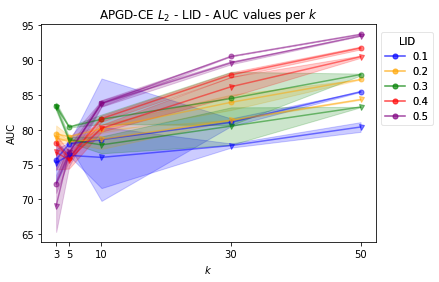

In [17]:
plot_fig(lid_l2_stacked_rf, lid_l2_mean_rf, lid_var_rf, lid_l2_stacked_lr, lid_l2_mean_lr, lid_l2_var_lr)